## Mushroom Classification Project
##### This document outlines the milestones covered in the mushroom classification project, from data preprocessing to training machine learning models and hyperparameter tuning.
## 📌 Introduction
#### This project aims to build a classification model that predicts whether a mushroom is safe to eat or poisonous using machine learning. The dataset consists of different categorical attributes of mushrooms.

- Dataset: Mushroom classification dataset

- Goal: Predict if a mushroom is Edible (E) or Poisonous (P)

- Models Used: Logistic Regression, Decision Trees, Random Forest, SVM, 

- Best Model: Random Forest (with hyperparameter tuning)




## Data Preprocessing
### 🔹 Objective:
Clean the dataset and prepare it for machine learning models.

### Dataset Overview
## Dataset Name: Mushroom Classification Dataset

**Source**: UCI Machine Learning Repository

**Number of Instances**: 8,124

**Number of Features**: 22 (Categorical)

**Target Variable**: class (Edible or Poisonous)



## 🔹 Steps Taken:
###  1.Load the Dataset:

The dataset was loaded into a Pandas DataFrame.

In [31]:
import pandas as pd

# Load the dataset
file_path = "mushrooms_dataset.csv"  # Change this to the correct file path
df = pd.read_csv(file_path)

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w    

#### 2. Handle Missing Values:
- Missing values can skew your analysis, so they need to be addressed:
- Checked for missing values and handled them appropriately (e.g., removed rows/columns with too many missing values).


In [55]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


#### 3. Save the Preprocessed Data:

- The cleaned dataset was saved as "preprocessed_mushroom_dataset.csv" for further analysis.

In [66]:
# Convert categorical variables to numerical using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}  # Dictionary to store label encoders

for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Save encoder for future decoding if needed

# Save the preprocessed dataset
df.to_csv("preprocessed_mushrooms_dataset.csv", index=False)

print("\nData preprocessing completed. Saved as 'preprocessed_mushrooms_dataset.csv'.")


Data preprocessing completed. Saved as 'preprocessed_mushrooms_dataset.csv'.


## 📌 Step 2: Exploratory Data Analysis (EDA)
### 🔹 Objective:
- Understand the dataset, find patterns, and visualize relationships between features.
### 🔹 Steps Taken:
#### 1. Basic Statistics & Data Distribution:

- Used .describe(), .info(), and .value_counts() to summarize the data.

#### 2. Class Distribution:

- Checked the distribution of edible vs. poisonous mushrooms.


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display dataset info
print("\nDataset Information:")
print(df.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-

#### Class Distribution:
- Edible (e): 4208 samples

- Poisonous (p): 3916 samples

* The dataset is fairly balanced, which is good for classification.*

### 3. Checking for duplicate rows

In [11]:
import pandas as pd

# Load the dataset (make sure to update the path if necessary)
df = pd.read_csv('mushrooms.csv')

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the number of duplicates
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Optionally display the duplicate rows
if not duplicate_rows.empty:
    print("\nDuplicate rows:")
    print(duplicate_rows)


Number of duplicate rows: 0


### 4. Analyzing feature distribution

In [14]:
import pandas as pd 

# Check class distribution
class_distribution = df['class'].value_counts()

# Check for duplicate values
duplicates = df.duplicated().sum()

class_distribution, duplicates


(class
 e    4208
 p    3916
 Name: count, dtype: int64,
 0)

## Conclusion:

### Feature Distribution Analysis:
- Most features have a few dominant categories.

- Some features (e.g., veil-type) appear to have only one category, meaning they may not be useful for classification.

odor and gill-color have high variability, which may help in classification.

### 

### 5.Loading dataset

In [21]:
import pandas as pd

# Load the dataset
df = pd.read_csv("mushrooms.csv")
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 6.Encoding categorical variables

In [23]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df_encoded = df.apply(LabelEncoder().fit_transform)
df_encoded.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### 7.Visualizing data

##### Using histograms

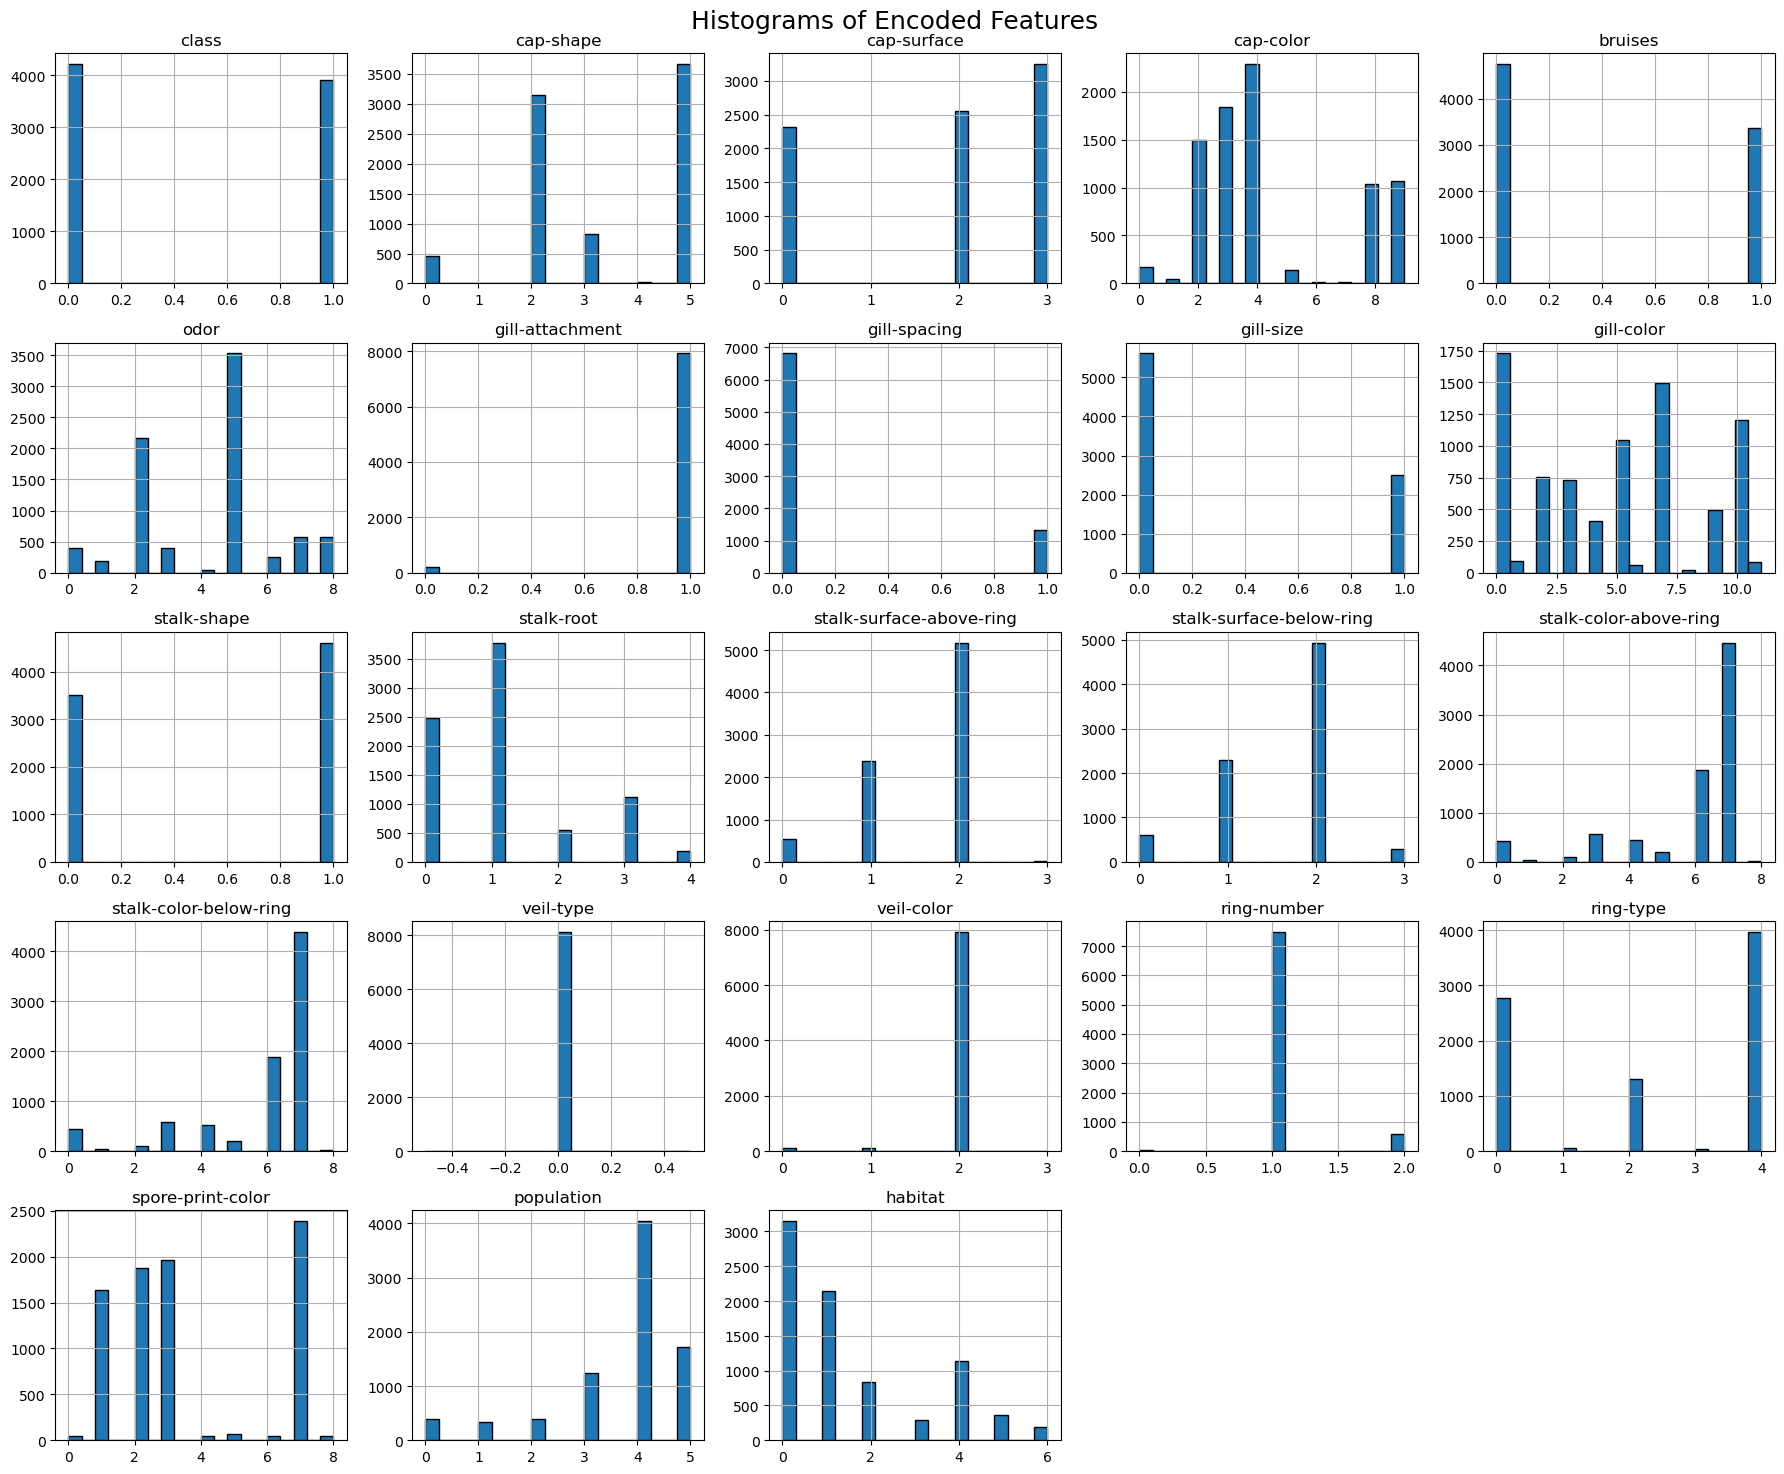

In [26]:
import matplotlib.pyplot as plt

df_encoded.hist(figsize=(18, 15), bins=20, edgecolor='black')
plt.suptitle("Histograms of Encoded Features", fontsize=18)
plt.tight_layout()
plt.show()


##### Histograms show us the distribution of a feature — basically, how often different values occur
#### Even though most of our features are categorical, after encoding, histograms can reveal skewed or balanced distributions.
#### This helps us see if the dataset is biased toward certain values.

C:\Users\USER\AppData\Local\Temp\ipykernel_4528\3051839443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.iloc[:, 0], palette="Set1")  # Assuming first column is the target


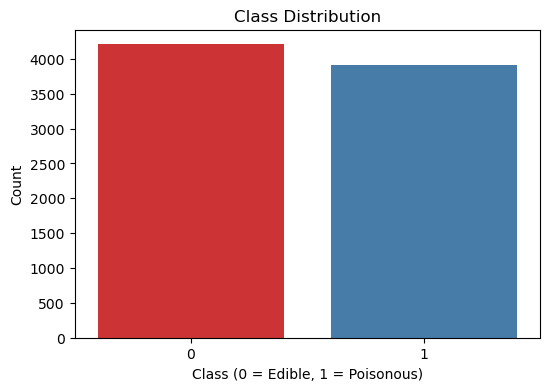

In [95]:
import seaborn as sns
# Visualizing class distribution (edible vs. poisonous)
plt.figure(figsize=(6, 4))
sns.countplot(x=df.iloc[:, 0], palette="Set1")  # Assuming first column is the target
plt.xlabel("Class (0 = Edible, 1 = Poisonous)")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()


##### Correlation Analysis:
- Identifiying which features are most correlated with the target variable.

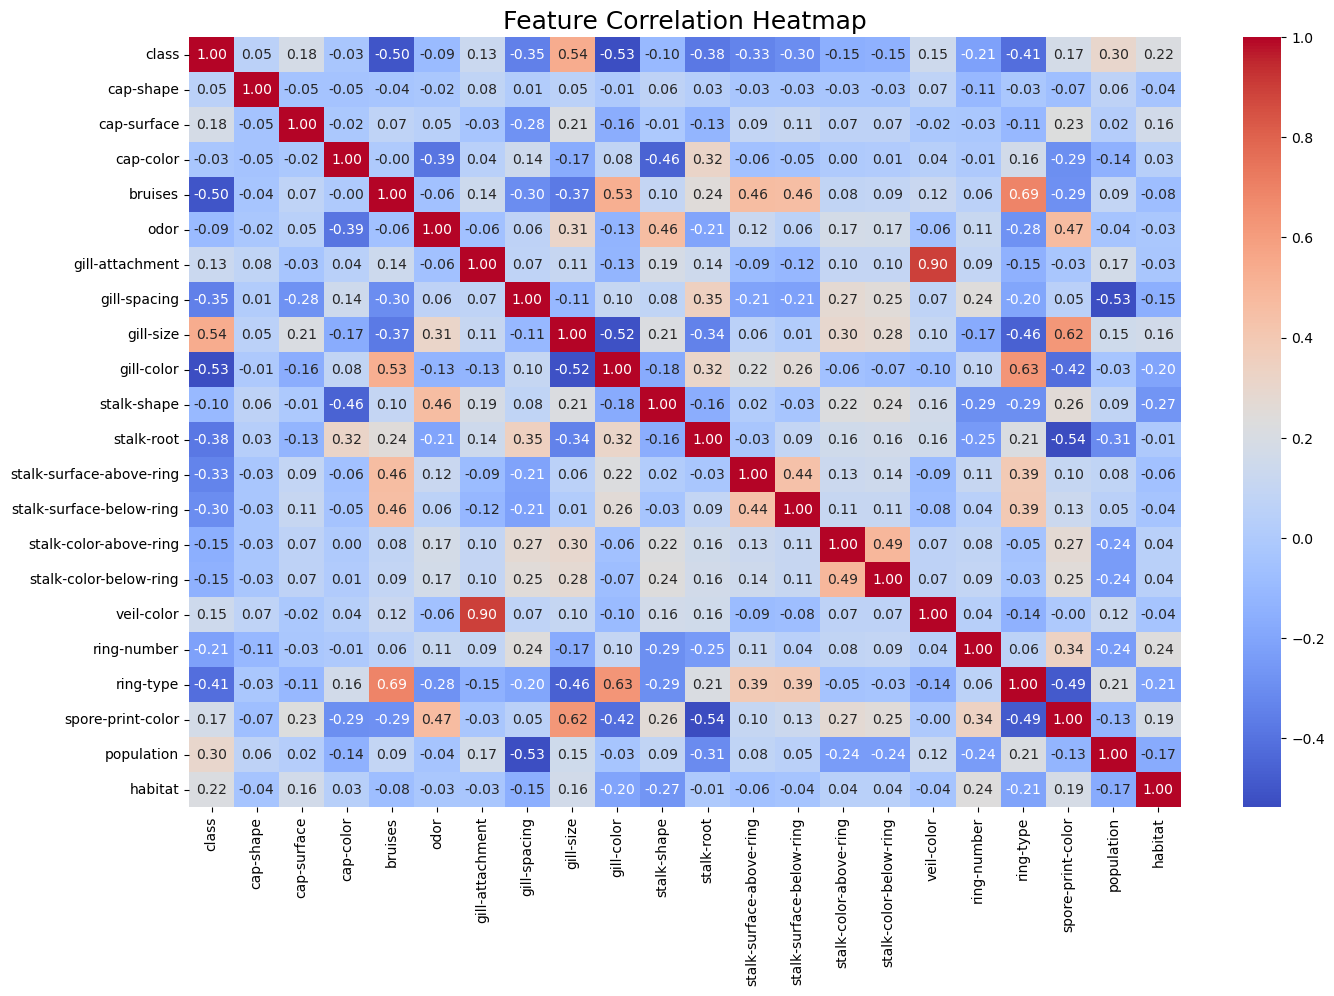

In [29]:
import seaborn as sns

# Drop constant columns (like 'veil-type' if present)
df_filtered = df_encoded.loc[:, df_encoded.nunique() > 1]
corr = df_filtered.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=18)
plt.show()


### Conclusion in Correlation Analysis:
- Some features have strong correlations with class, indicating they are important for classification.

- odor appears to be highly correlated with class, meaning it might be a key distinguishing feature.

- veil-type has only one category and provides no useful information, so it can be removed.

- There are some inter-feature correlations, but no extreme redundancy.

## 2.MODELLING

## Step 1.Train Machine Learning Models
## 🔹 Objective:
- Train different machine learning models for mushroom classification.

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load preprocessed dataset
df = pd.read_csv("cleaned_mushroom_dataset.csv")

## 🔹 Steps Taken:
### 1.Split Data into Training and Testing Sets:

- Used train_test_split() to divide the dataset into 80% training and 20% testing.

In [101]:
from sklearn.model_selection import train_test_split

# Assuming your data is in a DataFrame called df
# And your target variable (edibility) is in 'class' column

# Separate features and target
X = df.drop('class', axis=1)   # Features
y = df['class']                # Target

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)  # Keeps class balance

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (6499, 22)
Testing set shape: (1625, 22)


### 2.Training of different models

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the model
lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the model's performance
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f'Logistic Regression Accuracy: {lr_accuracy:.4f}')


Logistic Regression Accuracy: 0.9477


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model's performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')


Random Forest Accuracy: 1.0000


In [29]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
knn_predictions = knn_model.predict(X_test)

# Evaluate the model's performance
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'K-Nearest Neighbors Accuracy: {knn_accuracy:.4f}')


K-Nearest Neighbors Accuracy: 0.9963


In [31]:
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
svm_predictions = svm_model.predict(X_test)

# Evaluate the model's performance
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'Support Vector Machine Accuracy: {svm_accuracy:.4f}')


Support Vector Machine Accuracy: 0.9926


In [35]:
print(f'Logistic Regression Accuracy: {lr_accuracy:.4f}')
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')
print(f'Support Vector Machine Accuracy: {svm_accuracy:.4f}')
print(f'K-Nearest Neighbors Accuracy: {knn_accuracy:.4f}')


Logistic Regression Accuracy: 0.9477
Random Forest Accuracy: 1.0000
Support Vector Machine Accuracy: 0.9926
K-Nearest Neighbors Accuracy: 0.9963


### 3.Visualizing Model performance

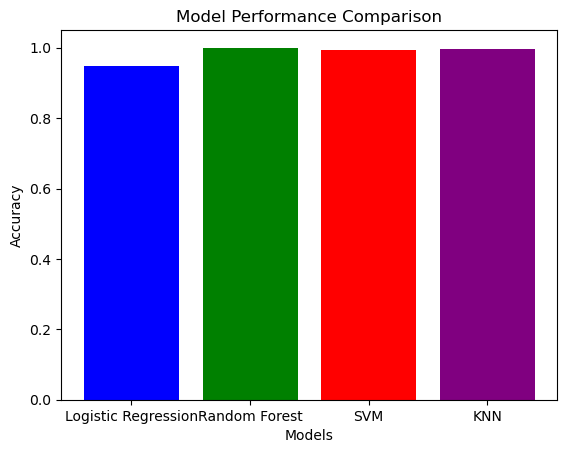

In [37]:
import matplotlib.pyplot as plt

# Bar plot for model comparison
models = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN']
accuracies = [lr_accuracy, rf_accuracy, svm_accuracy, knn_accuracy]

plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.show()


# 📌Hyperparameter Tuning 
## 🔹 Objective:
- Optimize the models to improve accuracy.


 ### 🔹 Steps Taken
 #### Grid Search for Hyperparameter Optimization:
- Used GridSearchCV() to find the best parameters for Random Forest.
- Adjusted parameters like n_estimators, max_depth, and min_samples_split.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Solvers to try
}

# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Perform GridSearchCV
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_lr.fit(X_train, y_train)

# Print the best parameters
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

# Use the best model found by GridSearchCV
best_lr_model = grid_search_lr.best_estimator_

# Evaluate the best model on the test set
best_lr_predictions = best_lr_model.predict(X_test)
best_lr_accuracy = accuracy_score(y_test, best_lr_predictions)
print(f'Best Logistic Regression Accuracy: {best_lr_accuracy:.4f}')


Best parameters for Logistic Regression: {'C': 100, 'solver': 'liblinear'}
Best Logistic Regression Accuracy: 0.9655


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

# Use the best model found by GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best model on the test set
best_rf_predictions = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_predictions)
print(f'Best Random Forest Accuracy: {best_rf_accuracy:.4f}')


C:\Users\USER\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Random Forest Accuracy: 1.0000


In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function for prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm for computing nearest neighbors
}

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Perform GridSearchCV
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_knn.fit(X_train, y_train)

# Print the best parameters
print("Best parameters for KNN:", grid_search_knn.best_params_)

# Use the best model found by GridSearchCV
best_knn_model = grid_search_knn.best_estimator_

# Evaluate the best model on the test set
best_knn_predictions = best_knn_model.predict(X_test)
best_knn_accuracy = accuracy_score(y_test, best_knn_predictions)
print(f'Best KNN Accuracy: {best_knn_accuracy:.4f}')


Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
Best KNN Accuracy: 0.9982


#### Random Forest is a strong performer out-of-the-box, especially for datasets like this where there may be complex, non-linear relationships between features. It is also less prone to overfitting compared to other models